In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the URL of the Wikipedia page containing FIFA World Cup information
url = "https://aziza.tn/fr/home"
# Send a GET request to the specified URL and store the response
response = requests.get(url).text


In [3]:
# Parse the content of the fetched webpage using BeautifulSoup
# The 'html.parser' is a built-in parser in Python for parsing HTML and XHTML documents
soup = BeautifulSoup(response, 'html.parser')

In [4]:
soup

<!DOCTYPE html>

<html lang="fr">
<head>
<meta charset="utf-8"/>
<meta content="مغازات عزيزة - Magasins Aziza" name="title"/>
<meta content="INDEX,FOLLOW" name="robots"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>مغازات عزيزة - Magasins Aziza</title>
<link href="https://aziza.tn/static/version1707842367/_cache/merged/9fcd907111566c85d42b3ea8b244423d.min.css" media="all" rel="stylesheet" type="text/css"/>
<link href="https://aziza.tn/static/version1707842367/frontend/Sm/market_magasin/fr_FR/css/styles-l.min.css" media="screen and (min-width: 768px)" rel="stylesheet" type="text/css"/>
<link href="https://aziza.tn/static/version1707842367/frontend/Sm/market_magasin/fr_FR/css/print.min.css" media="print" rel="stylesheet" type="text/css"/>
<link href="https://aziza.tn/media/favicon/stores/1/favicon.png" rel="icon" type="image/x-icon"/>
<link href="

In [5]:
# Extract product items
products = soup.find_all('li', class_='product-item')
products

[<li class="product-item btn"> <div class="product-item-info 2025-04-09 00:00:00" id="catalogues-derniere-img-f">
                           Semaine dernière 
                         </div>
 </li>,
 <li class="product-item active btn"> <div class="product-item-info 2025-04-16 00:00:00" id="catalogues-en-cours-img-f">
 
                         
                         Promos de la semaine 
 
                         </div>
 </li>,
 <li class="product-item btn"> <div class="product-item-info 2025-04-09 00:00:00" id="catalogues-derniere-img">
 <span class="product-image-container">
 <span class="product-image-wrapper">
 <img alt="Promo de la semaine" class="product-image-photo" height="" src="https://aziza.tn/media/catalog/product/cache/1267a79388e844632696facf1a71b0a2/1/_/1_6de3_f9f9.jpg" width="">
 </img></span>
 </span>
 </div>
 </li>,
 <li class="product-item active btn"> <div class="product-item-info 2025-04-16 00:00:00" id="catalogues-en-cours-img">
 <span class="product-image-co

In [6]:
# Initialize lists to store product details
product_names = []
categories = []
prices = []
promotional_details = []
availability_statuses = []

# Loop through each product item
for product in products:
    # Extract product name
    name_tag = product.find('a', class_='product-item-link')
    product_name = name_tag.text.strip() if name_tag else 'N/A'
    product_names.append(product_name)
    
    # Extract category (assuming it's in the 'brand' span)
    category_tag = product.find('span', class_='brand')
    category = category_tag.text.strip() if category_tag else 'N/A'
    categories.append(category)
    
    # Extract price
    price_tag = product.find('span', class_='price')
    price = price_tag.text.strip() if price_tag else 'N/A'
    prices.append(price)
    
    # Extract promotional details (assuming it's in the 'super' div)
    promo_tag = product.find('div', class_='super')
    promo = promo_tag.text.strip() if promo_tag else 'N/A'
    promotional_details.append(promo)
    
    # Extract availability status (assuming it's in the 'tocart' button)
    availability_tag = product.find('button', class_='tocart')
    availability = availability_tag.text.strip() if availability_tag else 'N/A'
    availability_statuses.append(availability)

# Create a DataFrame
data = {
    'Product Name': product_names,
    'Category': categories,
    'Price': prices,
    'Promotional Details': promotional_details,
    'Availability Status': availability_statuses
}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Product Name,Category,Price,Promotional Details,Availability Status
0,N/A,N/A,N/A,N/A,N/A
1,N/A,N/A,N/A,N/A,N/A
2,N/A,N/A,N/A,N/A,N/A
3,N/A,N/A,N/A,N/A,N/A
4,Lot Liquide vaisselle citron jaune + javel cla...,Lilas,"10,600",,Voir disponibilité
...,...,...,...,...,...
272,Sauteuse,,"23,990",N/A,Ajouter au panier
273,Poubelle à pédale,,"27,780",N/A,Ajouter au panier
274,Sèche linge pliable,,"29,980",N/A,Ajouter au panier
275,Aspirateur balai,HUAYI,"89,980",N/A,Ajouter au panier


In [7]:
df.head(10)

,Product Name,Category,Price,Promotional Details,Availability Status
0,N/A,N/A,N/A,N/A,N/A
1,N/A,N/A,N/A,N/A,N/A
2,N/A,N/A,N/A,N/A,N/A
3,N/A,N/A,N/A,N/A,N/A
4,Lot Liquide vaisselle citron jaune + javel cla...,Lilas,"10,600",,Voir disponibilité
5,Lot liquide vaisselle + javel classique gratuit,Lilas,"10,600",,Voir disponibilité
6,Couche bébé GM confort max actif 15-15 +linget...,,"15,550",,Voir disponibilité
7,Couche bébé GM confort max actif 3-5 +lingette...,,"15,550",,Voir disponibilité
8,Couche bébé GM junior max actif1 16 +lingette ...,,"15,550",,Voir disponibilité
9,Couche bébé GM confort max actif + lingette gr...,Lilas,"15,550",,Voir disponibilité


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Name         277 non-null    object
 1   Category             277 non-null    object
 2   Price                277 non-null    object
 3   Promotional Details  277 non-null    object
 4   Availability Status  277 non-null    object
dtypes: object(5)
memory usage: 10.9+ KB


In [9]:
df.isnull().sum()

Product Name           0
Category               0
Price                  0
Promotional Details    0
Availability Status    0
dtype: int64

In [10]:
# Removing non-digit characters from the price column and converting it to a float
df['Price'] = df['Price'].str.replace('[^\\d]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').astype(float)

# Standardize text fields
df['Product Name'] = df['Product Name'].str.title().str.strip()
df['Category'] = df['Category'].str.title().str.strip()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         277 non-null    object 
 1   Category             277 non-null    object 
 2   Price                273 non-null    float64
 3   Promotional Details  277 non-null    object 
 4   Availability Status  277 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.9+ KB


In [25]:
# Checking unique products to understand the data for hierarchical grouping

df['Product Name'].unique()

array(['N/A',
       'Lot Liquide Vaisselle Citron Jaune + Javel Classique Gratuit',
       'Lot Liquide Vaisselle + Javel Classique Gratuit',
       'Couche Bébé Gm Confort Max Actif 15-15 +Lingette Gratuit',
       'Couche Bébé Gm Confort Max Actif 3-5 +Lingette Gratuit',
       'Couche Bébé Gm Junior Max Actif1 16 +Lingette Gratuit',
       'Couche Bébé Gm Confort Max Actif + Lingette Gratuit',
       'Pinces À Linge', 'Lot De 3 Ceintres Multicolore',
       'Brosse À Linge', 'Boite De Conservation', 'Pelle Et Balayette',
       'Bouchon Évier', 'Boite À Gouter Avec Couverts',
       'Butoirs De Porte', 'Balai En Plastique',
       'Boite De Conservation Avec Cuillère', 'Mug En Céramique',
       'Tasse En Verre Avec Paille', 'Boite De Conservation En Plastique',
       'Distributeur De Liquide Vaisselle', 'Tulip Jar',
       'Brosse Polyvalente', 'Tapis De Robinet', 'Seau En Plastique',
       'Anti Vibration', 'Boite De Conservation En Verre',
       "Tapis D'Évier Rectangulaire",

In [27]:
# Categorizing products into hierarchical groups

def categorize_hierarchy(name):
    name = name.lower()

    # Electronics
    if any(word in name for word in ['tv', 'casque', 'grille pain', 'blender', 'fer à repasser', 'lampe', 'gaufrier']):
        return 'Electronics > Appliances'
    elif any(word in name for word in ['voiture', 'poupée', 'jouet', 'dinosaure']):
        return 'Toys & Games > Vehicles or Dolls'

    # Food
    elif any(word in name for word in ['yaourt', 'fromage', 'cake', 'gaufrette', 'muffin', 'tarte', 'pain', 'crème', 'biscuit']):
        return 'Food > Dairy & Bakery'
    elif any(word in name for word in ['boisson', 'jus', 'eau', 'nectar', 'café']):
        return 'Food > Beverages'
    elif any(word in name for word in ['sauce', 'harissa', 'huile', 'thon', 'salami', 'jambon', 'riz']):
        return 'Food > Condiments & Staples'

    # Household Items
    elif any(word in name for word in ['liquide vaisselle', 'eau de javel', 'lessive', 'nettoyant']):
        return 'Household > Cleaning Supplies'
    elif any(word in name for word in ['verre', 'tasse', 'mug', 'assiette', 'boite', 'bouteille', 'pot', 'plateau']):
        return 'Household > Kitchenware'
    elif any(word in name for word in ['presse-agrumes', 'faitout', 'moule', 'sauteuse', 'plat']):
        return 'Household > Cookware'

    # Personal Care
    elif any(word in name for word in ['shampooing', 'déodorant', 'dentifrice', 'cotton-tige']):
        return 'Personal Care > Hygiene'

    # Textiles & Accessories
    elif any(word in name for word in ['chaussette', 'serviette']):
        return 'Textiles > Apparel & Linens'

    # Seasonal/Other
    elif 'encensoir' in name:
        return 'Seasonal > Religious Items'
    elif 'hlou' in name or 'gateau' in name:
        return 'Food > Sweets & Desserts'

    else:
        return 'General > Other'

In [31]:
# Applying hierarchical grouping to the DataFrame
df['Hierarchy'] = df['Product Name'].apply(categorize_hierarchy)

df.head(30)

,Product Name,Category,Price,Promotional Details,Availability Status,Hierarchy
0,N/A,N/A,NaN,N/A,N/A,General > Other
1,N/A,N/A,NaN,N/A,N/A,General > Other
2,N/A,N/A,NaN,N/A,N/A,General > Other
3,N/A,N/A,NaN,N/A,N/A,General > Other
4,Lot Liquide Vaisselle Citron Jaune + Javel Cla...,Lilas,10600.0,,Voir disponibilité,Household > Cleaning Supplies
5,Lot Liquide Vaisselle + Javel Classique Gratuit,Lilas,10600.0,,Voir disponibilité,Household > Cleaning Supplies
6,Couche Bébé Gm Confort Max Actif 15-15 +Linget...,,15550.0,,Voir disponibilité,General > Other
7,Couche Bébé Gm Confort Max Actif 3-5 +Lingette...,,15550.0,,Voir disponibilité,General > Other
8,Couche Bébé Gm Junior Max Actif1 16 +Lingette ...,,15550.0,,Voir disponibilité,General > Other
9,Couche Bébé Gm Confort Max Actif + Lingette Gr...,Lilas,15550.0,,Voir disponibilité,General > Other


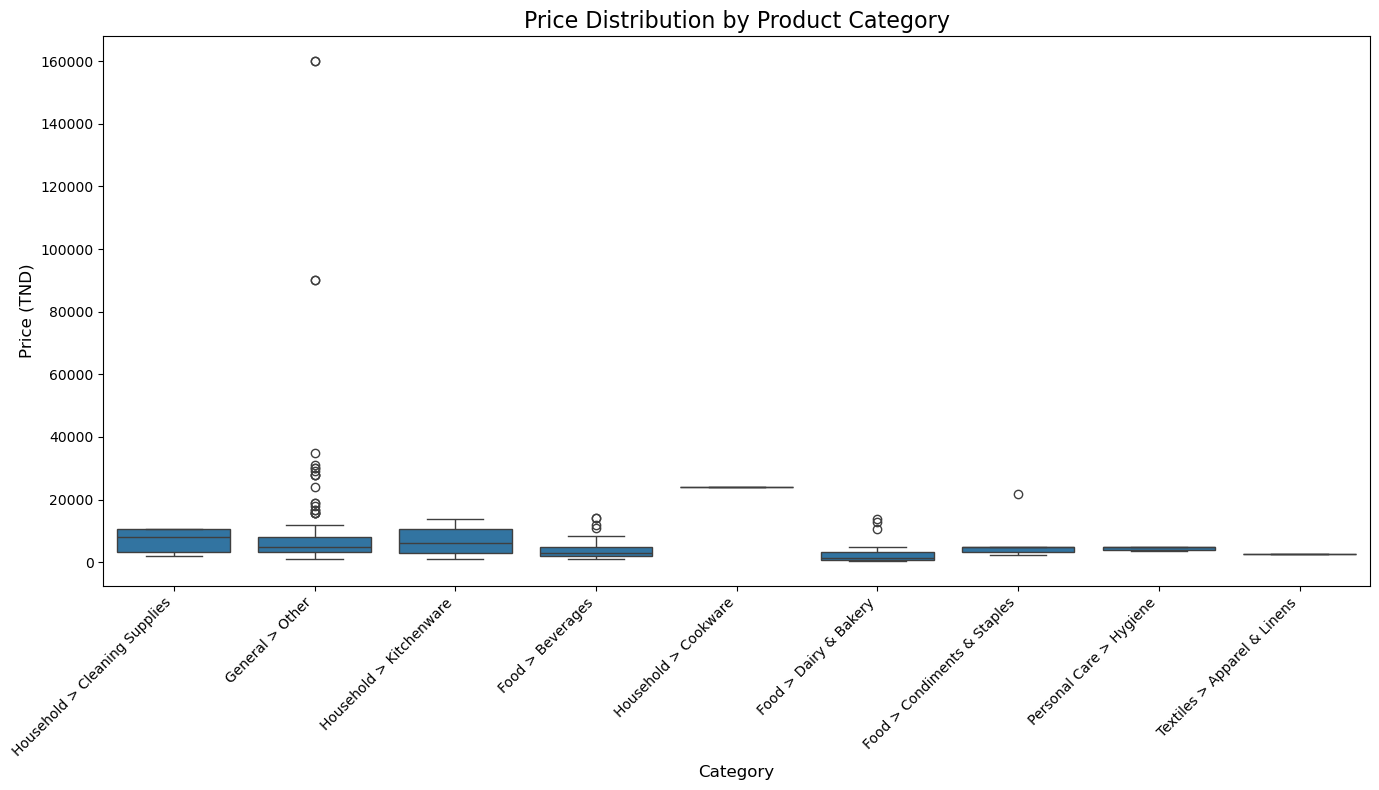

In [41]:
# Question 1: What is the Price Variability per Product Category (Which categories show wide pricing ranges)?
# Filter out zero or negative prices
filtered_df = df[df['Price'] > 0]

# Set figure size
plt.figure(figsize=(14, 8))

# Create the boxplot
sns.boxplot(data=filtered_df, x='Hierarchy', y='Price', showfliers=True)

# Add title and labels
plt.title('Price Distribution by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price (TND)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to fit long labels
plt.tight_layout()

# Show plot
plt.show()


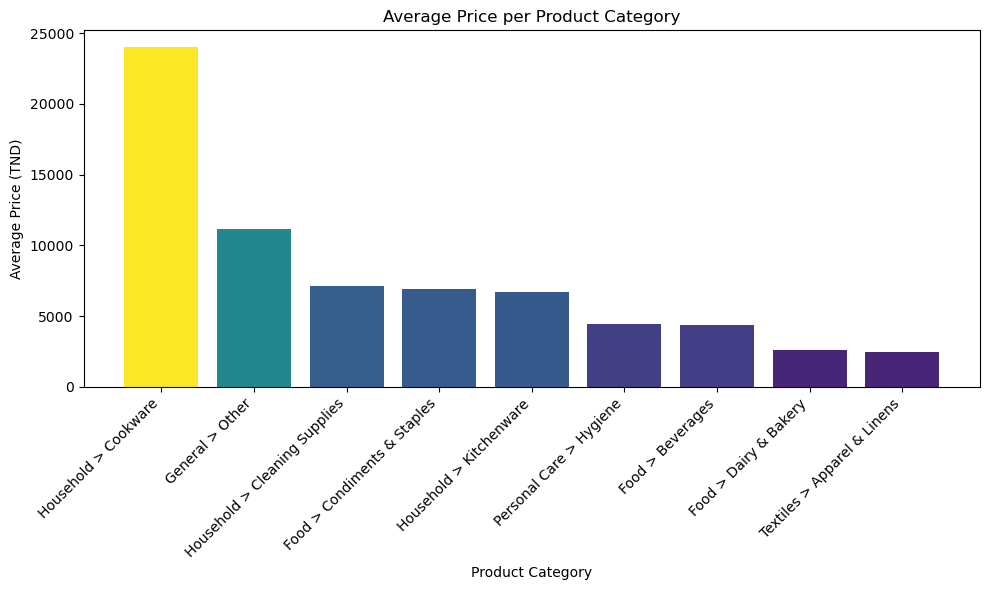

In [49]:
# Question 2: What is the Average Pricing Within Each Product Category (Which product categories are the most/least expensive)?

# Step 1: Group and calculate the average price per category
avg_prices = df.groupby('Hierarchy')['Price'].mean().sort_values(ascending=False)

# Step 2: Create the bar chart using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_prices.index, avg_prices.values, color=plt.cm.viridis(avg_prices.values / max(avg_prices.values)))

# Step 3: Add chart labels and title
plt.title('Average Price per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price (TND)')
plt.xticks(rotation=45, ha='right')  # Rotate x labels

# Step 4: Show the chart
plt.tight_layout()
plt.show()


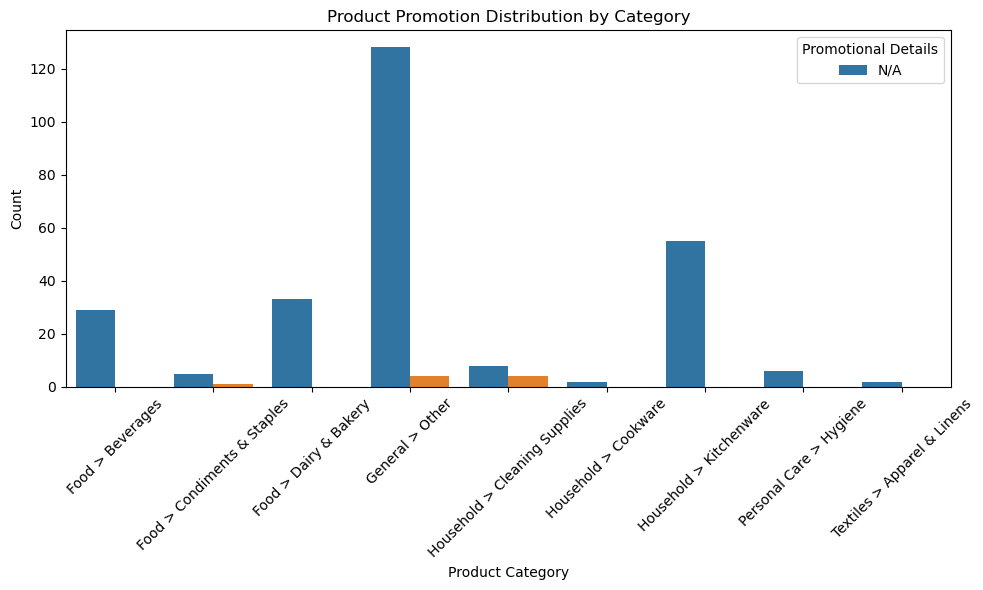

In [53]:
# Question 3: Which Categories Have the Highest Share of Products on Promotion?

# Group by 'Hierarchy' and 'Promotion' and count entries
promo_df = df.groupby(['Hierarchy', 'Promotional Details']).size().reset_index(name='Count')

# Set figure size
plt.figure(figsize=(10, 6))

# Create a grouped barplot
sns.barplot(
    data=promo_df,
    x='Hierarchy',
    y='Count',
    hue='Promotional Details'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title and labels
plt.title('Product Promotion Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


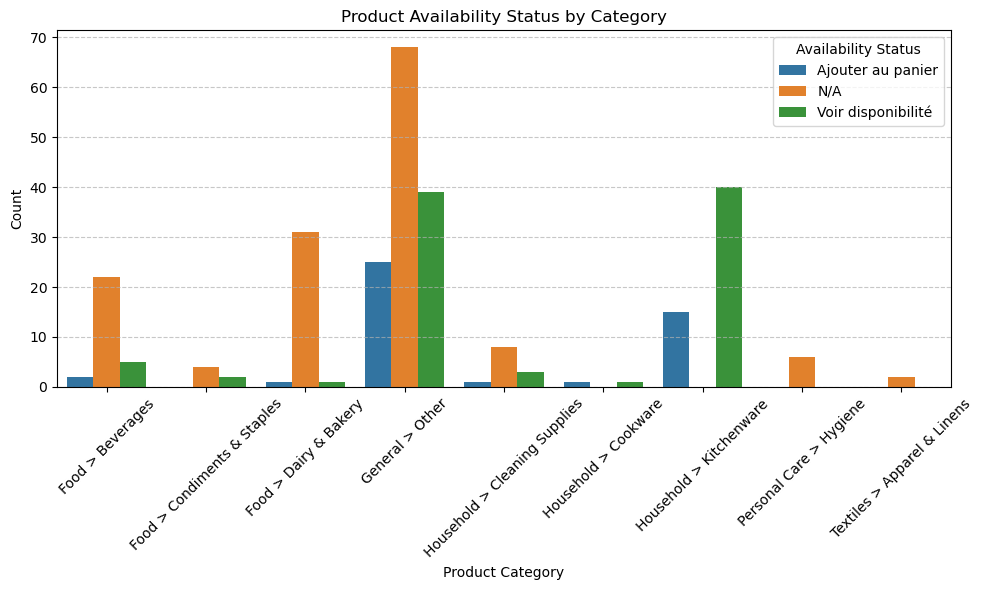

In [59]:
# Question 4: What is the Availability Status Across All Categories (Are there availability gaps in certain categories)?
avail_df = df.groupby(['Hierarchy', 'Availability Status']).size().reset_index(name='Count')

# Set figure size
plt.figure(figsize=(10, 6))

# Create a grouped bar chart using seaborn
sns.barplot(
    data=avail_df,
    x='Hierarchy',
    y='Count',
    hue='Availability Status'  # Separate bars by availability
)

# Customize title and labels
plt.title('Product Availability Status by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add legend and grid
plt.legend(title='Availability Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [67]:
# Ajouter au panier - (Add to Cart)

# Voir disponibilité - (See Availability)

# N/A - (Unavailable)